In [1]:
library(readxl)
library(tidyverse)
library(tidymodels)
library(GGally)
library(repr)
library(rvest)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.1     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.8      ✔ rsample   0.0.7 
✔ infer     0.5.3      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.1.3 
✔ parsnip   0.1.3    

# Title: Testing National Economic Indicators to Suicide Rates

# Introduction

On a suicide analysis report by WHO, they reported that suicide is within the top three leading causes of death. There are approximately 800 000 suicides each year, estimated to one death every 40 seconds. 90% of these cases result from mental health disorders. However, suicide is also associated with sociocultural factors such as socioeconomic, family, and individual crises. This includes events such as a loss of a loved one, feeling disconnection with one’s community or social/belief group, and financial problems.

The question we are trying to answer with our project is this: Does a country's economic performance measured by their GDP PPP (gross domestic product purchasing power parity) per capita and unemployment rate percentage have an impact on their suicide rates? If so, how? 

The country's age-standardized suicide data have been taken from WHO (World Health Organisation) in 2016. The countries’ economic data is sourced from The Heritage Foundation 2016 Index of Economic Freedom. 

The predictor variables our group will use to evaluate a country’s economic performance and individual economic well-being are the country’s Gross Domestic Product Purchasing Power Parity (GDP PPP) per capita and unemployment rate percentage. The target variable our group will be predicting is the country’s age-standardized suicide rate per 100,000 people.



# Method

The Economic Index of 2016 data is saved to the variable “url” and downloaded to the user local computer using `download.file`. Then it is read into the notebook using `read_excel`.

In [2]:
# url to the index 2016 economic data
url <- "https://www.heritage.org/index/excel/2016/index2016_data.xls"
download.file(url, destfile="economic_index2016_data.xls", mode="wb")
economic_data <- read_excel('economic_index2016_data.xls')
head(economic_data)

CountryID,Country Name,WEBNAME,Region,World Rank,Region Rank,2016 Score,Change in Yearly Score from 2015,Property Rights,Change in Property Rights from 2015,⋯,Country,Population (Millions),"GDP (Billions, PPP)",GDP Growth Rate (%),5 Year GDP Growth Rate (%),GDP per Capita (PPP),Unemployment (%),Inflation (%),FDI Inflow (Millions),Public Debt (% of GDP)
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,Afghanistan,Afghanistan,Asia-Pacific,N/A,N/A,N/A,N/A,N/A,N/A,⋯,Afghanistan,31.279,60.578000000000003,1.534,6.8158000000000003,1936.7149999999999,9.0999999999999996,4.6109999999999998,53.560000000000002,6.7000000000000002
2,Albania,Albania,Europe,59,27,65.920000000000002,0.20000000000000001,35,5,⋯,Albania,2.774,31.556000000000001,2.102,2.2742,11376.825000000001,16.100000000000001,1.625,1093.4803000009285,72.563999999999993
3,Algeria,Algeria,Middle East / North Africa,154,13,50.060000000000002,1.2,25,-5,⋯,Algeria,38.700,551.80899999999997,4.129,3.3273999999999999,14258.620000000001,9.5,2.9169999999999998,1488,8.7639999999999993
4,Angola,Angola,Sub-Saharan Africa,156,39,48.939999999999998,1,15,0,⋯,Angola,24.383,175.64099999999999,4.222,4.7008000000000001,7203.3469999999998,6.7999999999999998,7.2960000000000003,-3881,38.042999999999999
5,Argentina,Argentina,South and Central America / Caribbean,169,27,43.770000000000003,-0.29999999999999999,15,0,⋯,Argentina,41.961,947.57299999999998,0.469,4.3987999999999996,22582.499,8.1999999999999993,37.600000000000001,6612,48.564
6,Armenia,Armenia,Europe,54,23,66.959999999999994,-0.10000000000000001,20,0,⋯,Armenia,3.293,24.282,3.432,4.1997999999999998,7373.5320000000002,17.100000000000001,3.1110000000000002,382.8413837927186,44.222000000000001


The WHO 2016 suicide data is read directly from the web using `read_csv`.

In [3]:
suicide_data <- read_csv("https://web.archive.org/web/20190122092847if_/http://apps.who.int/gho/athena/data/GHO/MH_12?filter=COUNTRY:*;REGION:*&x-sideaxis=COUNTRY;SEX&x-topaxis=GHO;YEAR&profile=crosstable&format=csv", skip = 1)
head(suicide_data)

Parsed with column specification:
cols(
  Country = col_character(),
  Sex = col_character(),
  `2016` = col_double(),
  `2015` = col_double(),
  `2010` = col_double(),
  `2000` = col_double()
)



Country,Sex,2016,2015,2010,2000
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Afghanistan,Both sexes,6.4,6.6,7.4,8.1
Afghanistan,Male,10.6,10.9,12.5,14.3
Afghanistan,Female,2.1,2.1,2.1,1.7
Albania,Both sexes,5.6,5.3,7.7,5.8
Albania,Male,7.0,6.7,9.5,8.2
Albania,Female,4.3,4.0,6.0,3.6


When choosing which variables would be the best predictors, it is important to remember that we are testing and predicting on data from many countries and that finding a fair and simple way to measure across each country is important. 
GDP per capita is chosen as a variable because it is a measurement that has been collected for many decades, collected in each country, and is adjusted for price changes, and inflation and thus reported in real terms that are ‘fair comparisons’ from year to year. Having this “long standing recorded measure that’s standardized and can create studies that can be repeated over long terms and repeated continually in the future” which allows for the study to be repeated and reasonably compared with older models(STUDY E). Additionally, GDP per capita allows for groupings to be made that are already widely accepted such as income levels of; high, upper-middle, lower-middle, and low. Being able to group countries together, may allow for creating more tailored plans for suicide intervention and prevention plans, instead of a ‘one-size fits all’ approach. 
The variable unemployment rate is used as a predictor in our model because Sommer’s study suggests that the impact of employment is unaffected when controlling for variables such as income, education, car access, deprivation, and marital status(EMP). Additionally, much of the logic used to justify GDP per capita as a variable in our model also applies to using the variable unemployment rate in our model. Such as having a long-standing recorded measure and a standardized variable. This variable also differentiates between who would and would not be considered part of the labour force. The unemployment rate only accounts for people actively looking for and available for work and considers those who are not working due to health as part of the non-active labour force which is not included within this variable(5). 


In the Index of Economic Freedom data set, the predictor variables were selected from the data set and converted from factor to numeric by using `as.numeric`. Then the columns were renamed using `colnames`.

In [4]:
#select the columns from the original data and convert them to numeric data
economic_data_tidy <- economic_data %>%
        select("Country", "Region", "GDP per Capita (PPP)", "Unemployment (%)") %>%
        mutate("GDP per Capita (PPP)" = as.numeric(economic_data$"GDP per Capita (PPP)")) %>%
        mutate("Unemployment (%)" = as.numeric(economic_data$"Unemployment (%)")) 
colnames(economic_data_tidy) <- c("country", "region", "gdp_per_capita", "unemployment_percentage")
head(economic_data_tidy)

Warning message:
“Problem with `mutate()` input `GDP per Capita (PPP)`.
ℹ NAs introduced by coercion
ℹ Input `GDP per Capita (PPP)` is `as.numeric(economic_data$"GDP per Capita (PPP)")`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”
Warning message:
“Problem with `mutate()` input `Unemployment (%)`.
ℹ NAs introduced by coercion
ℹ Input `Unemployment (%)` is `as.numeric(economic_data$"Unemployment (%)")`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


country,region,gdp_per_capita,unemployment_percentage
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,Asia-Pacific,1936.715,9.1
Albania,Europe,11376.825,16.1
Algeria,Middle East / North Africa,14258.620,9.5
Angola,Sub-Saharan Africa,7203.347,6.8
Argentina,South and Central America / Caribbean,22582.499,8.2
Armenia,Europe,7373.532,17.1


In the suicide data from WHO, the target variable was selected from the data set and filtered to include both males and females in the national suicide rate. The columns were then renamed using `colnames`.

In [5]:
suicide_tidy <- suicide_data %>%
            filter(Sex == "Both sexes") %>%
            select("Country", "2016") 
colnames(suicide_tidy) <- c("country","suicide_rate")
head(suicide_tidy)

country,suicide_rate
<chr>,<dbl>
Afghanistan,6.4
Albania,5.6
Algeria,3.3
Angola,8.9
Antigua and Barbuda,0.5
Argentina,9.1


To create a data set that includes the predictor variables and the target variables, we merge the two data sets using the function `merge()`. Within the merge function parameters, the country variable was used as a key variable to combine two different data sets. The resulting data frame only contains the name of the countries shared by the two original data sets.

In [6]:
# combining two data frames
suicide_economic_data <- merge(economic_data_tidy,suicide_tidy, by="country")
head(suicide_economic_data)

,country,region,gdp_per_capita,unemployment_percentage,suicide_rate
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Afghanistan,Asia-Pacific,1936.715,9.1,6.4
2,Albania,Europe,11376.825,16.1,5.6
3,Algeria,Middle East / North Africa,14258.620,9.5,3.3
4,Angola,Sub-Saharan Africa,7203.347,6.8,8.9
5,Argentina,South and Central America / Caribbean,22582.499,8.2,9.1
6,Armenia,Europe,7373.532,17.1,5.7


Finally, the data set is split into 60/40 ratio using `intial_split`. We assign the training data and testing data using `training` and `testing` on the split object. 

In [7]:
set.seed(1)

suicide_economic_data_split <- initial_split(data = suicide_economic_data, prop = 0.6, strata = "suicide_rate")
training_data <- training(suicide_economic_data_split)
testing_data <- testing(suicide_economic_data_split)

For the summary of the exploratory data analysis, we include the number of observations, standard deviation, and mean of each of the predictor variables and the target variable. The number of observations recorded are calculated using `!is.na` that returns the vector with all the recorded entries of the column and `sum` to count the number of elements in that vector. The mean and the standard deviation of the recorded observations was calculated using `sd` and `mean` with `na.rm = TRUE` in the parameter to exclude unrecorded observation from the data. 
The 3 by 3 matrix is created with the names of the variables on the rows and the labels for summary values on the column.

In [8]:
count_of_GDP <- sum(!is.na(training_data$gdp_per_capita))
count_of_SR <- sum(!is.na(training_data$suicide_rate))
count_of_unemployment <- sum(!is.na(training_data$unemployment_percentage))

avg_GDP <- mean(training_data$gdp_per_capita, na.rm = TRUE)
avg_SR <- mean(training_data$suicide_rate, na.rm = TRUE)

sd_GDP <- sd(training_data$gdp_per_capita, na.rm = TRUE)
sd_SR <- sd(training_data$suicide_rate, na.rm = TRUE)

avg_unemployment_percentage <- mean(training_data$unemployment_percentage, na.rm = TRUE)
sd_unemployment_percentage <- sd(training_data$unemployment_percentage, na.rm = TRUE)

matx <- c(count_of_unemployment,avg_unemployment_percentage,sd_unemployment_percentage, 
          count_of_GDP,avg_GDP,sd_GDP, 
          count_of_SR,avg_SR,sd_SR)

coln <- c("Count of Occurances","Average","Standard Deviation")
rown <- c("Unemployment Rate","GDP Per Capita","Suicide Rate")

summary <- matrix(matx,
                  nrow = 3, byrow = TRUE,
                  dimnames = list(rown, coln))
summary

,Count of Occurances,Average,Standard Deviation
Unemployment Rate,86,8.318605,5.879626
GDP Per Capita,92,20232.103011,23303.505514
Suicide Rate,92,9.595652,4.987036


Visualizing the dataset for our exploratory data analysis, GDP per capita (PPP) is plotted against suicide rate (%), through a scatterplot. Each plot represents a different country and is organised by color with a key of region. Another exploratory visualization is unemployment rate (%) vs Suicide rate (%). The countries are represented again with a scatterplot with region being the color key.  For both visualizations, unmodified training data is used. 
Both plots are using the ggplot() function, with title being set with ggtitle(), labels added with labs() and the color aesthetic is applied with geom_point(). We scale and increase the size of the graph with options() to make the graph easier to read. Theme() is applied to change font size to match the increased scale of the graph.

$title
[1] "GDP Per Capita (PPP) v Suicide Rate (%)"

attr(,"class")
[1] "labels"

$title
[1] "National Unemployment Percentage v Suicide Rate"

attr(,"class")
[1] "labels"

Warning message:
“Removed 6 rows containing missing values (geom_point).”


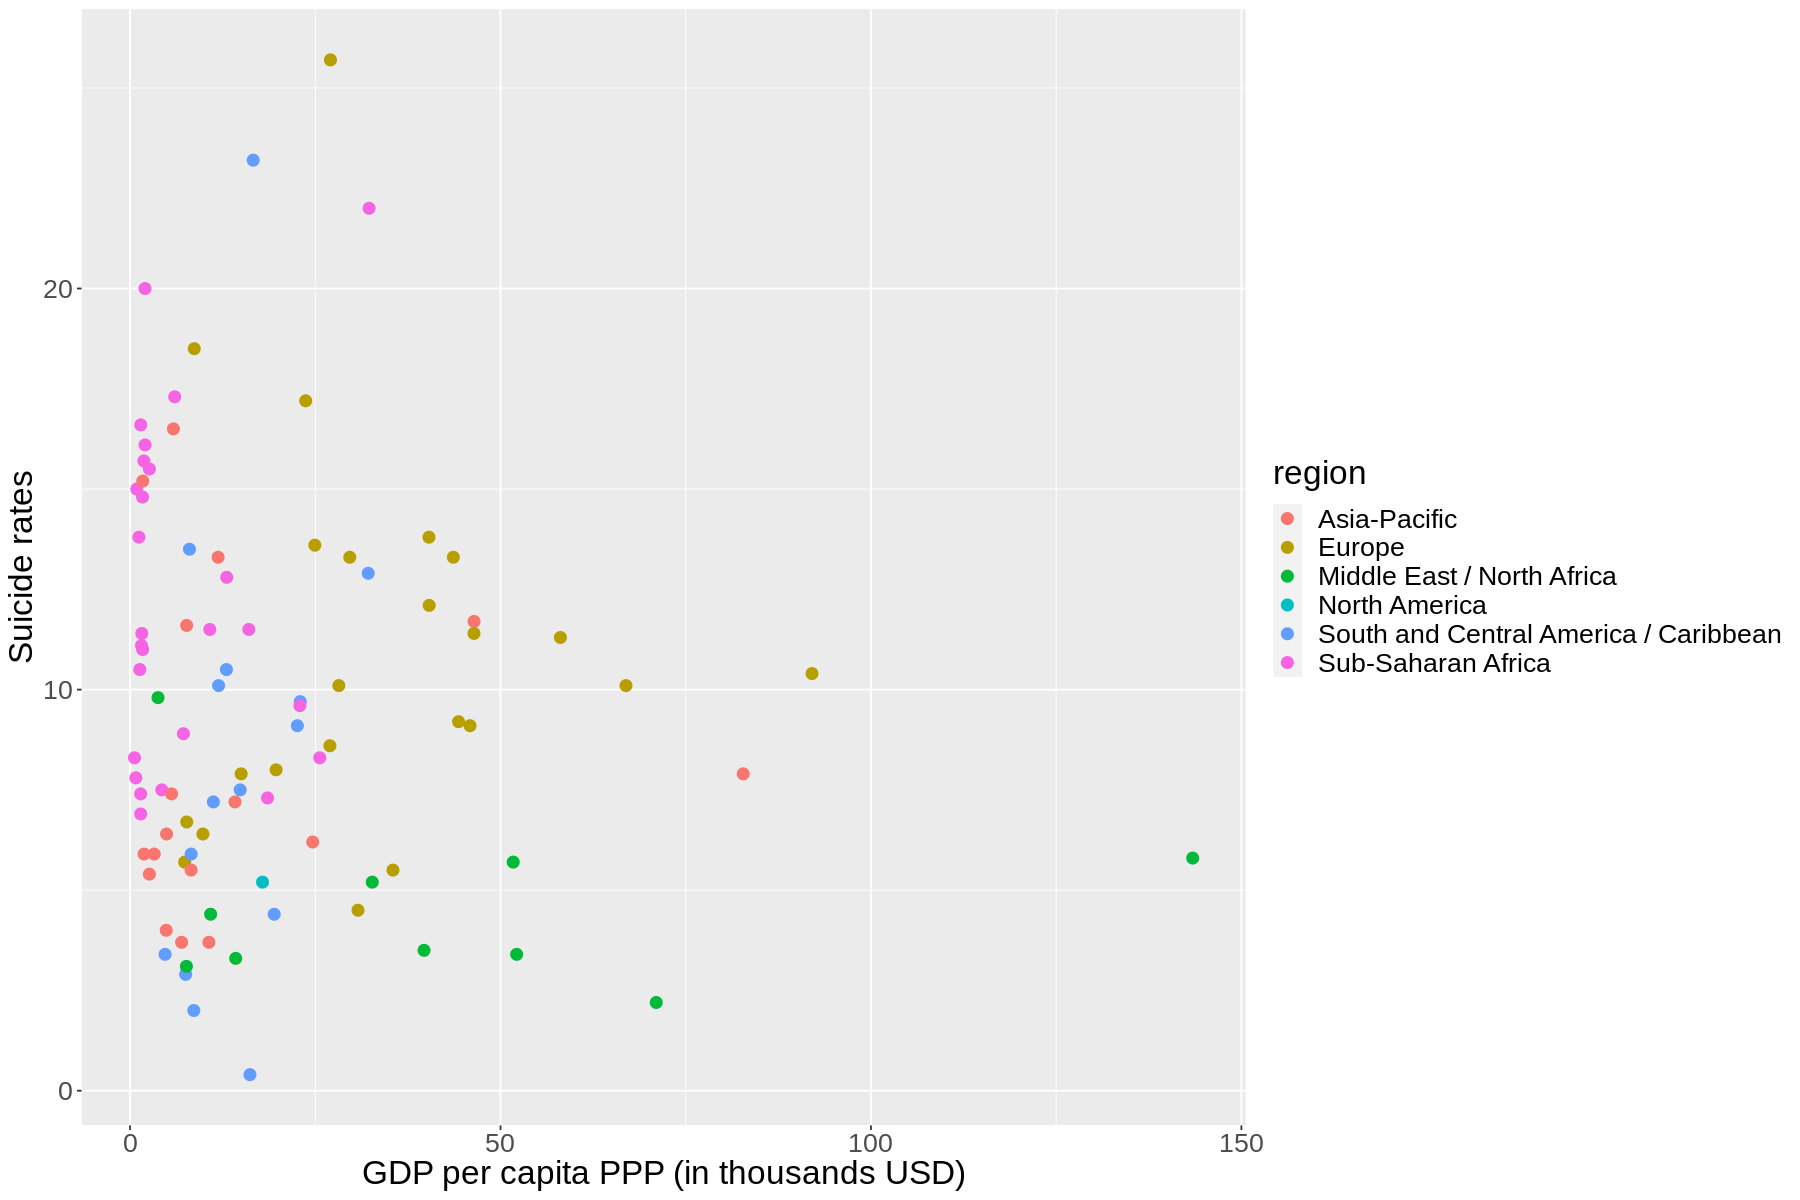

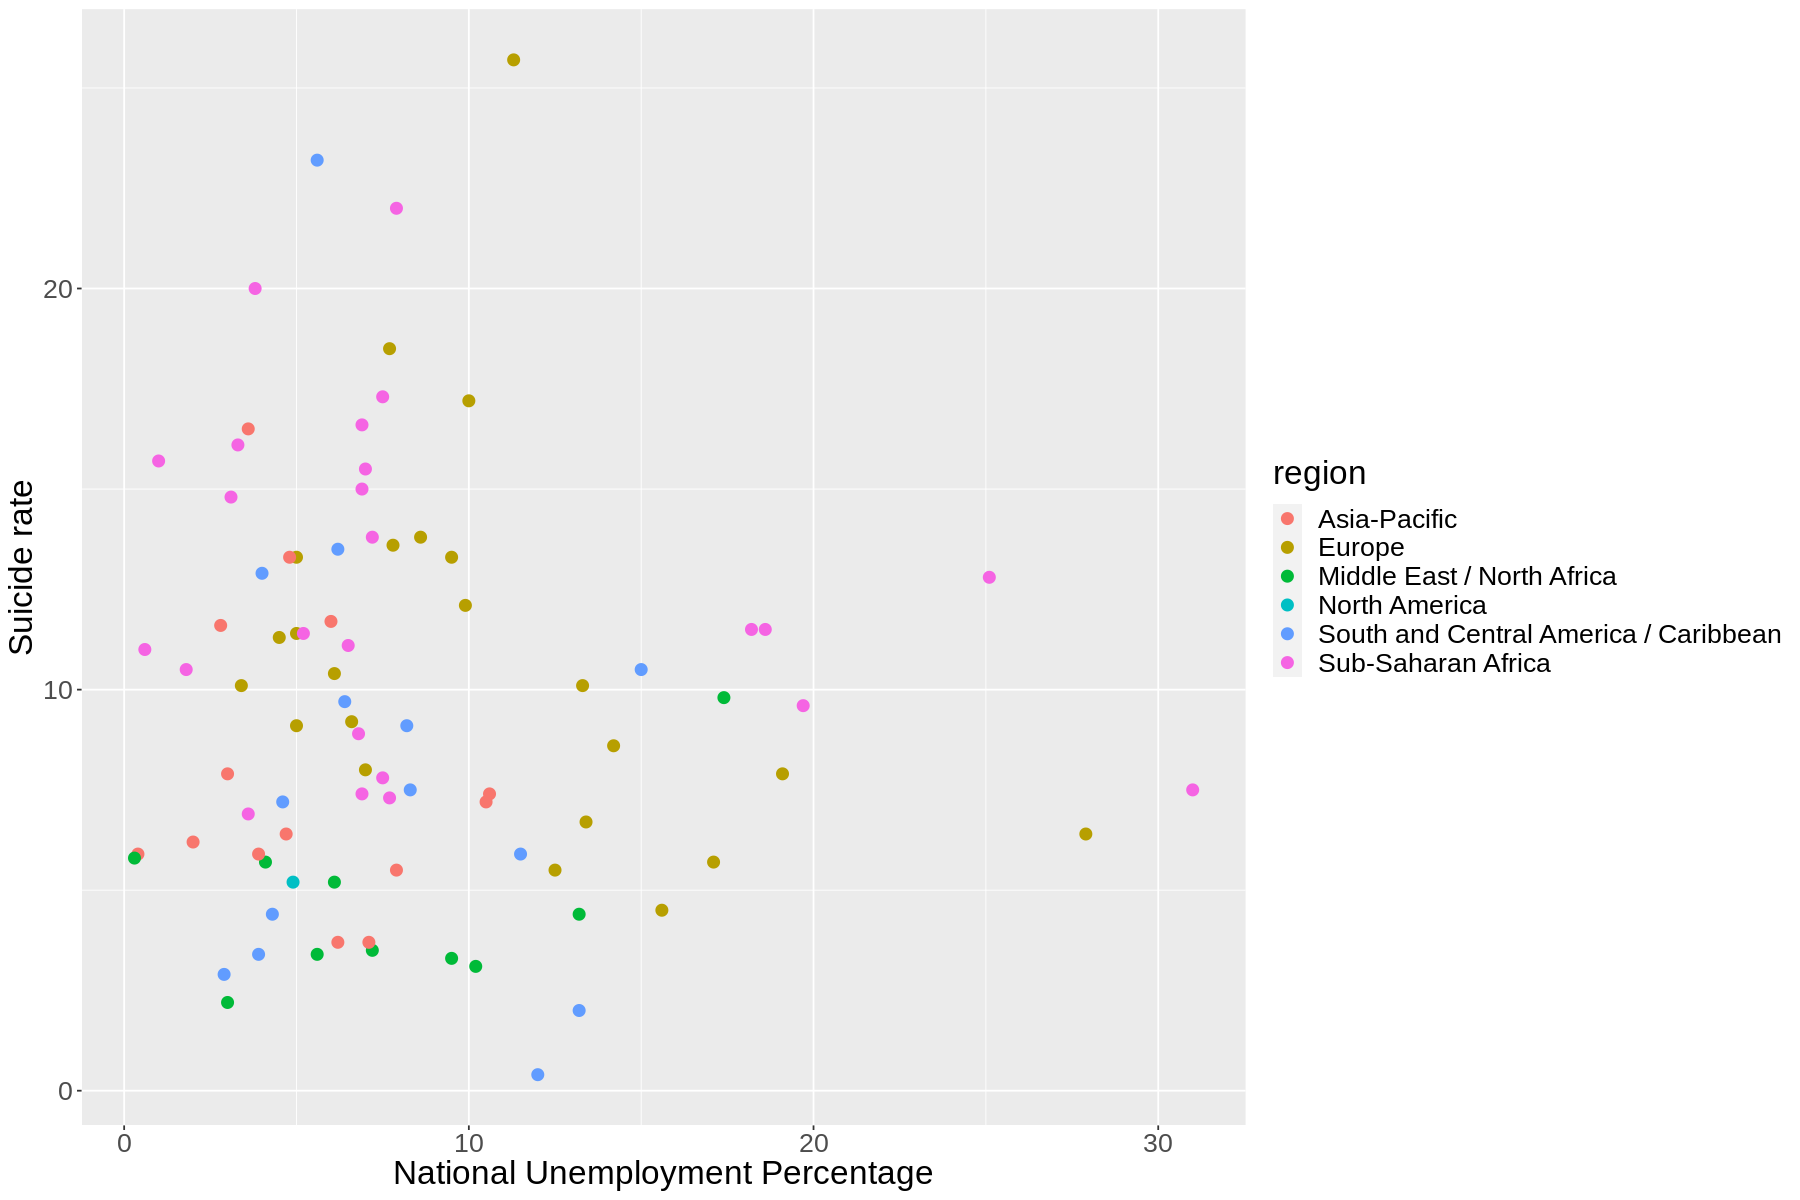

In [9]:
ggtitle("GDP Per Capita (PPP) v Suicide Rate (%)")
options(repr.plot.width = 15, repr.plot.height = 10)
prelim_data_plot_gdp <- training_data %>%
    ggplot(aes(x=gdp_per_capita / 1000, y=suicide_rate)) +
    geom_point(aes(color = region), size = 3) +
    labs(x="GDP per capita PPP (in thousands USD)", y="Suicide rates") + 
    theme(text=element_text(size=20))
prelim_data_plot_gdp

ggtitle("National Unemployment Percentage v Suicide Rate")
options(repr.plot.width = 15, repr.plot.height = 10)
prelim_data_plot_unemployment <- training_data %>%
    ggplot(aes(x=unemployment_percentage, y=suicide_rate)) +
    geom_point(aes(color = region), size = 3) +
    labs(x="National Unemployment Percentage", y="Suicide rate") + 
    theme(text=element_text(size=20))
prelim_data_plot_unemployment

From the observation of the graphs from the exploratory data analysis above, the relationship between the suicide rate and GDP per capita (PPP) and between the suicide rate and unemployment is relatively linear, therefore our group decided to use the linear regression model to perform the data analysis on the training data using `linear_reg()` model specification and specify "lm" in `set_engine` and classify the model as a regression problem in `set_mode`. 

We create the recipe with the predictor and target variables and fit our training model below using `workflow`. Within the workflow, the recipe and the linear regression model is added using `add_recipe` and `add_model`.

In [10]:
set.seed(1)
lm_data_spec <- linear_reg() %>%
        set_engine("lm") %>%
        set_mode("regression")

lm_data_recipe <- recipe(suicide_rate ~ gdp_per_capita + unemployment_percentage, data = training_data)


lm_data_fit <- workflow() %>%
        add_recipe(lm_data_recipe) %>%
        add_model(lm_data_spec) %>%
        fit(data = training_data)
lm_data_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: linear_reg()

── Preprocessor ────────────────────────────────────────────────────────────────
0 Recipe Steps

── Model ───────────────────────────────────────────────────────────────────────

Call:
stats::lm(formula = ..y ~ ., data = data)

Coefficients:
            (Intercept)           gdp_per_capita  unemployment_percentage  
              1.100e+01               -2.619e-05               -9.411e-02  


Finally, we predict on the test data set using predict() and assess how well our model based on the rmspe value does using metrics(), filter the .metric column and select the rmse value from the data frame, and present it as a single number value.

In [11]:
lm_data_predict <- lm_data_fit %>%
         predict(testing_data) %>%
         bind_cols(testing_data) 
lm_rmspe <- lm_data_predict %>%
         metrics(truth = suicide_rate, estimate = .pred) %>%
         filter(.metric == 'rmse') %>%
         select(.estimate) %>%
         pull()
lm_rmspe

[1] 6.170379

To visualize the result of the training model, we create two scatterplots with the national unemployment percentage against the suicide rate and the GDP per capita (PPP) against the suicide rate from **lm_data_predict** similarly to the plot from the preliminary data analysis. However, for the visualization of the predictions, a blue line is added over the data points from the **.pred** column in **lm_data_predict**.

Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


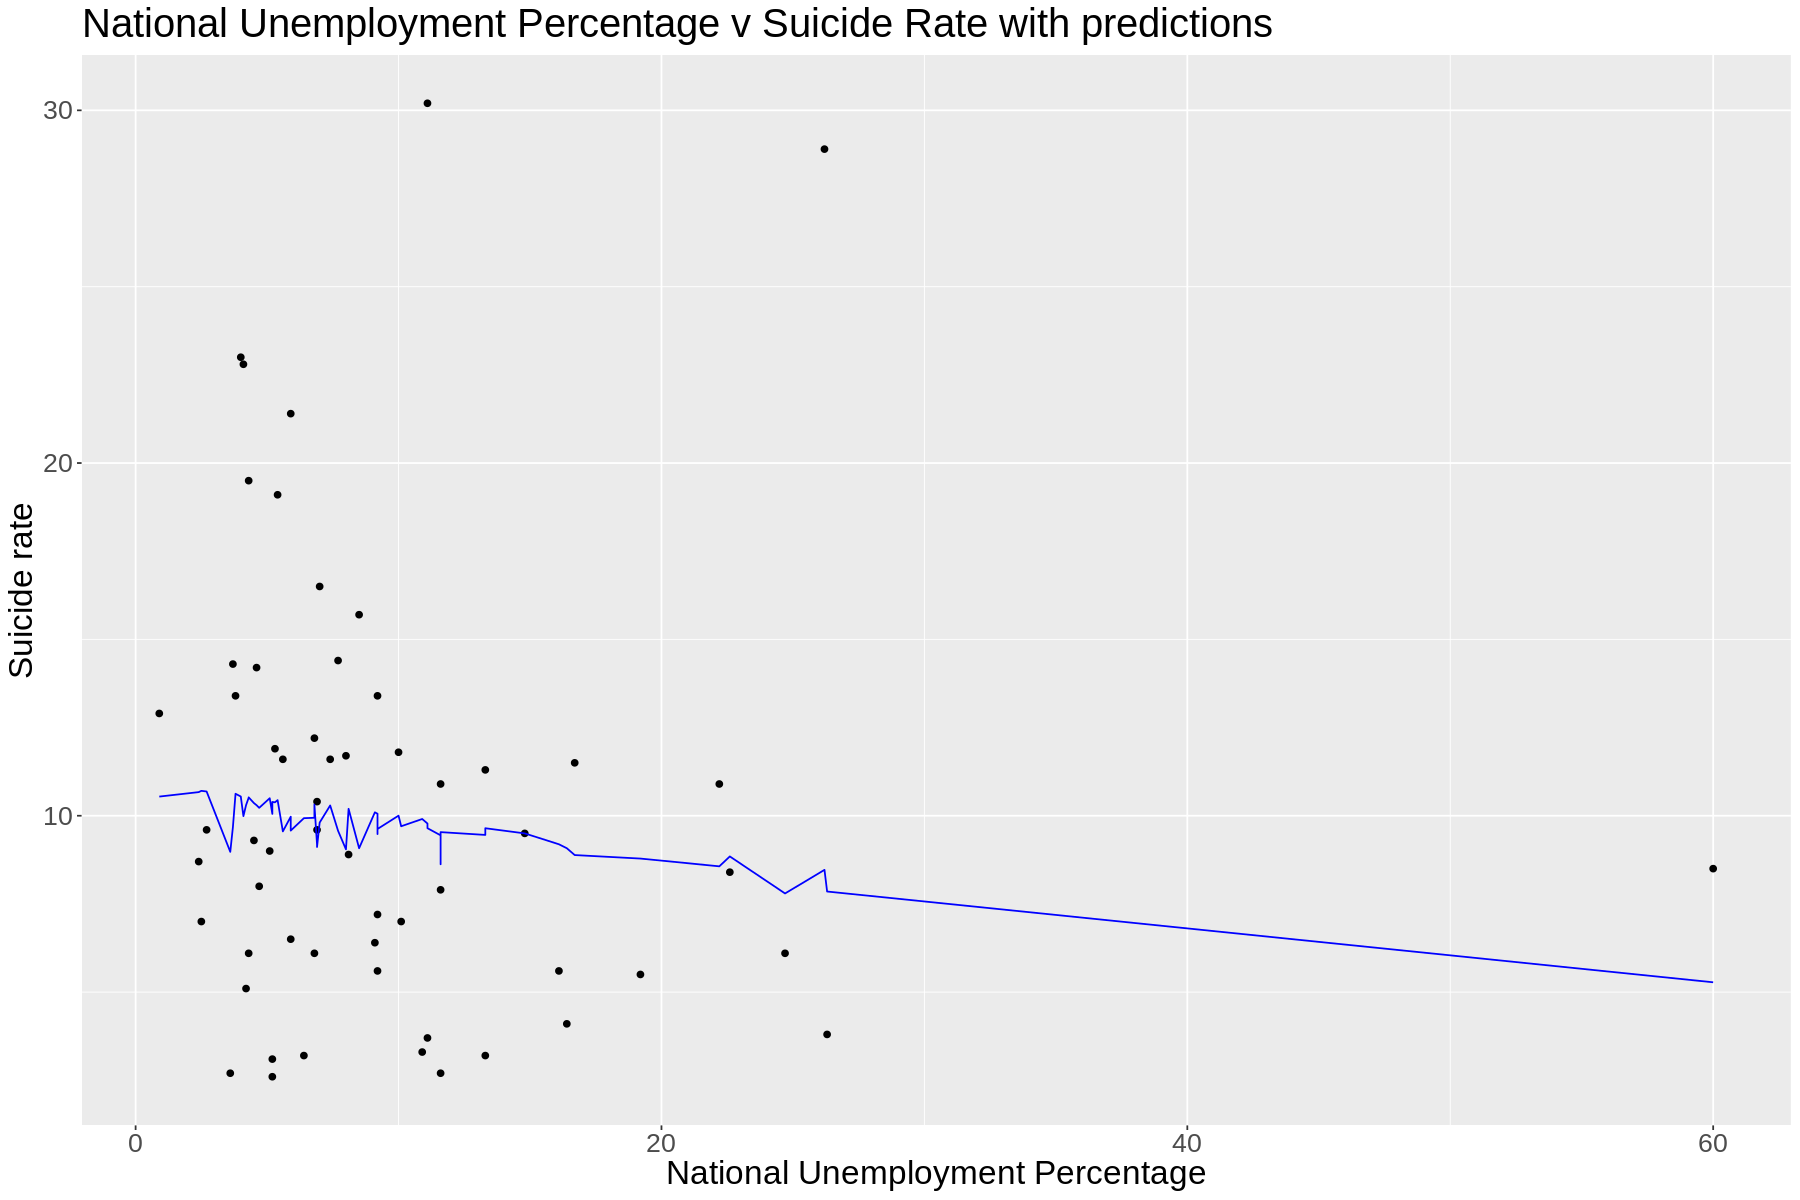

In [12]:
options(repr.plot.width = 15, repr.plot.height = 10)
ggplot(lm_data_predict, aes(x = unemployment_percentage, y = suicide_rate)) +
geom_point() +
geom_line(data = lm_data_predict, aes(x = unemployment_percentage, y = .pred), color = "blue") + 
theme(text=element_text(size=20)) +
labs(x="National Unemployment Percentage", y="Suicide rate") + 
ggtitle("National Unemployment Percentage v Suicide Rate with predictions")

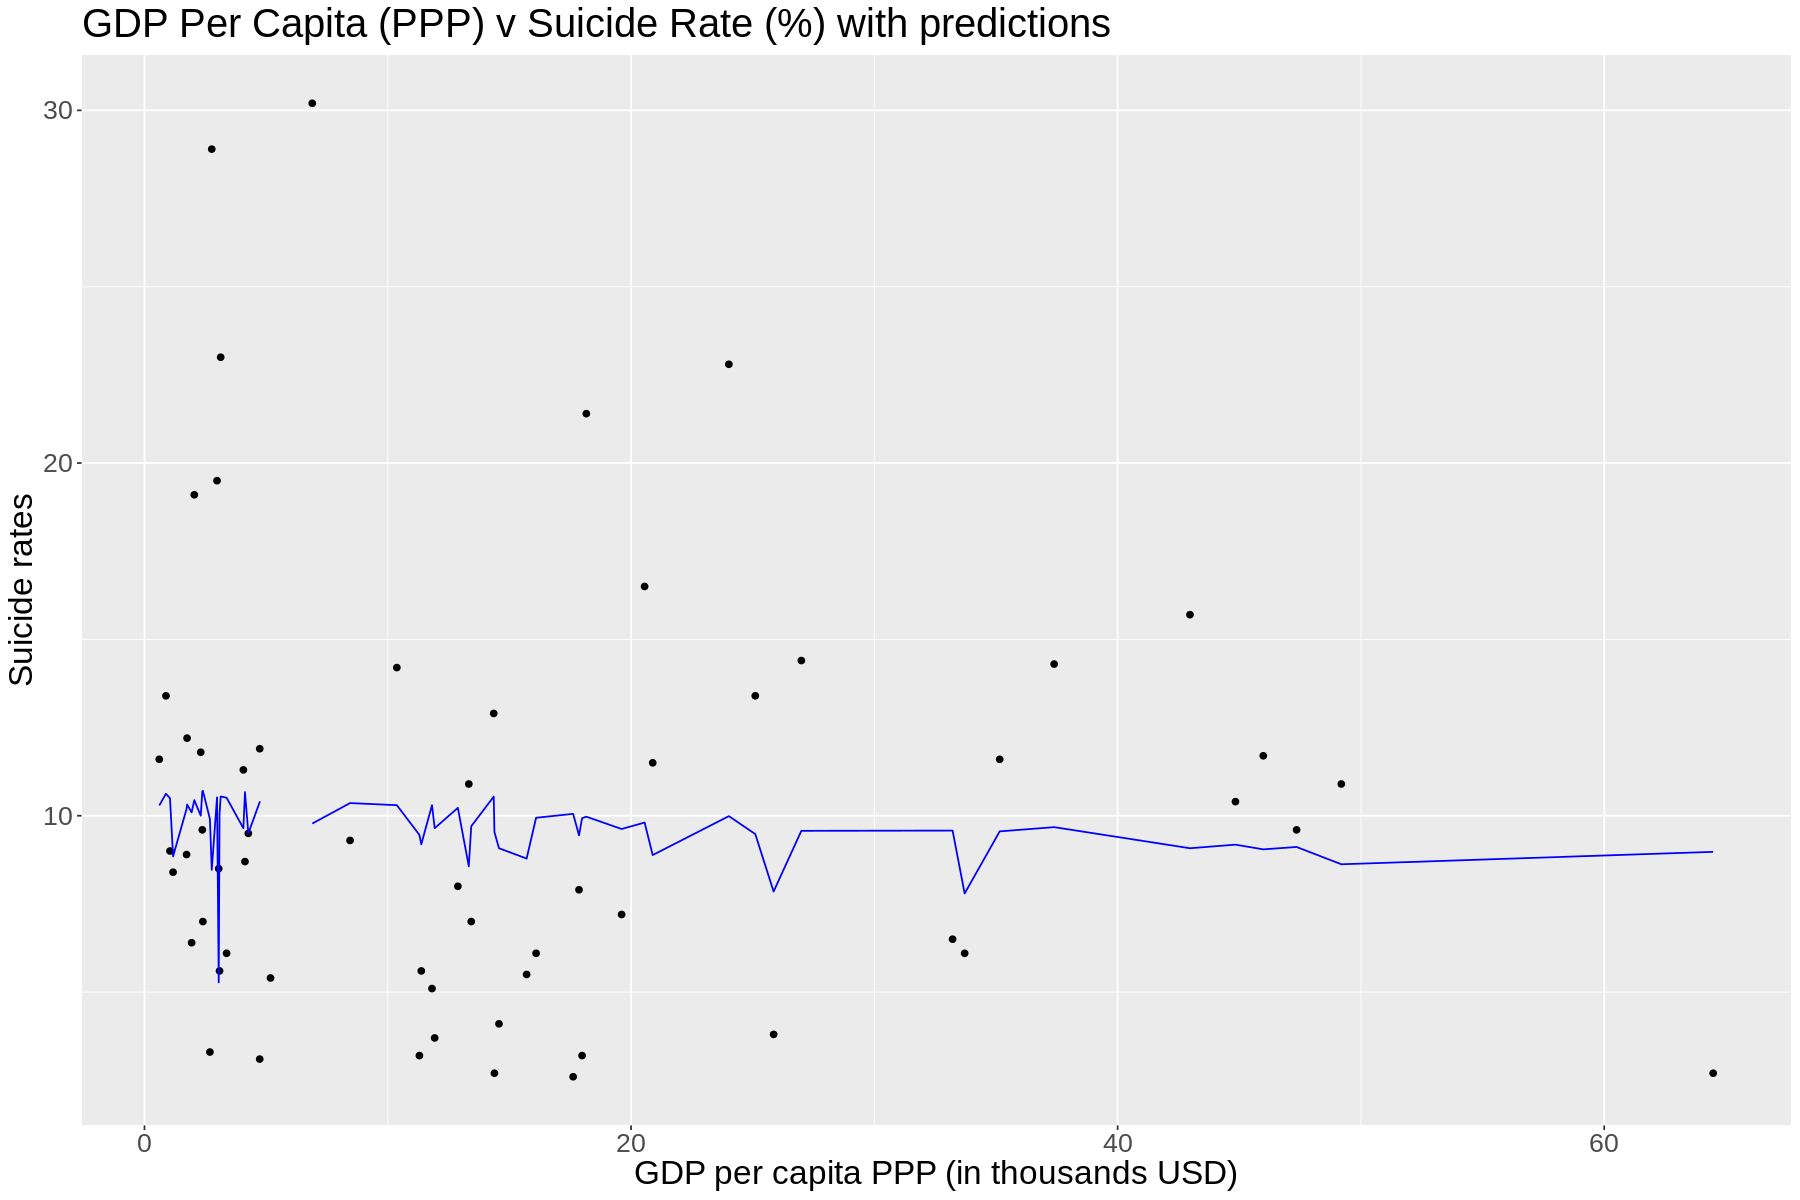

In [13]:
ggplot(lm_data_predict, aes(x = gdp_per_capita/1000, y = suicide_rate)) +
geom_point() +
geom_line(data = lm_data_predict, aes(x = gdp_per_capita/1000, y = .pred), color = "blue") + 
theme(text=element_text(size=20)) +
labs(x="GDP per capita PPP (in thousands USD)", y="Suicide rates") + 
ggtitle("GDP Per Capita (PPP) v Suicide Rate (%) with predictions") 

# Discussion

From our project, we found that the GDP PPP and unemployment rate of a country does not have a significant impact on the suicide rate of that country. When we graphed our two variables with the suicide rate of 92 different countries, there was no clear relationship represented with our dots. This was not what we expected to find because we expected a rise in suicide rates as the unemployment rates increased and as GDP PPP decreased. This would have informed us that economic performance and individual economic well-being impacts the number of suicides taken place in that country. However, our results that there is no correlation is not a surprise because it has been reported that 90% of suicides are caused from mental health, and the factors that we worked with were part of the remaining 10%.

Now that we know our variables do not have a clear relationship with the suicide rates, an impact we can make is to start looking into not just the GDP PPP, but look at the relationship between GDP and how much infrastructure is actually available for mental health. We can also look into the wages of the citizens and see if a person’s income has a bigger impact than the unemployment rate variable.

Because this current coronavirus pandemic has made huge impacts on the government and individual economic performances, we could continue with further questions such as if the suicide rates have gone up after the numerous lost jobs during this pandemic. With this, we will be able to see if unemployment rates do have an impact on suicide rates when they are significantly greater than usual.


# Citation

World Health Organization. (2019, September 2). Suicide. Retrieved November 04, 2020, from https://www.who.int/news-room/fact-sheets/detail/suicide

Sommers, P.M. (2018, September 18). The Empirical Relationship between Suicide and Unemployment Rates, 2008–2016. Alt Econ J 46, 353-354 (2018).   Retrieved from https://doi.org/10.1007/s11293-018-9593-7

Bhandarkar and Shah. (2008, December 1). Cross-National Study of the Correlation of General Population Suicide Rates with Unemployment Rates. Psychological Reports 2008, 103, 793-796. Retrieved from https://doi.org/10.2466/pr0.103.3.793-796